<a href="https://colab.research.google.com/github/amaartin/Senales-y-Sistemas/blob/main/SLIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolución

La convolución $y(t) = x(t) * h(t)$ se realizará a partir de las siguientes señales

\begin{align}
h(t) &= e^{-t} \\
x(t) &= \text{rect} \left(t - \frac{1}{2}\right)
\end{align}


In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, tau = sym.symbols('t tau', real=True)#variables simbólicas


#Definicion de pulso rectagunlar
class rect(sym.Function): #función pulso rectangular
    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)


def plot_signals(x_axis, x, h, ylabel, xlabel):#función para graficar convolución esto mediante la funcion llamada plot_signals y se utiliza para graficar dos señales simbolicas x y h usando sympy
    p1 = sym.plot(x, (x_axis, -5, 5), show=False, line_color='b', ylabel=ylabel, xlabel=xlabel) # show=falso indica que el grafico no se muestre imediatamente
    p2 = sym.plot(h, (x_axis, -5, 5), show=False, line_color='r')
    p1.extend(p2)
    p1.show()

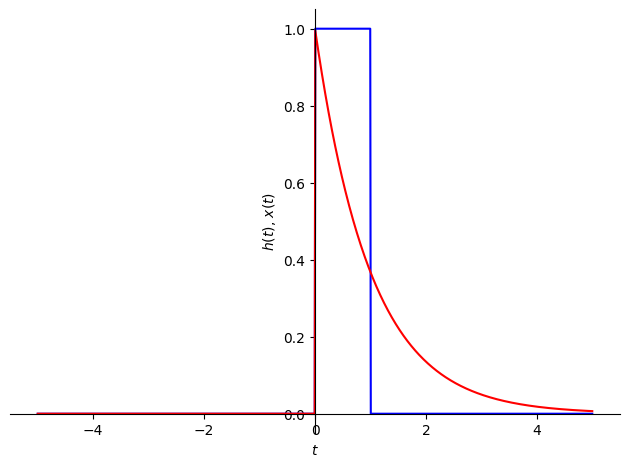

In [ ]:
#Definicion y trazo de señales con rojo h(t) y con azul x(t)

h = sym.exp(-t) * sym.Heaviside(t) # multiplicamos por la funcion de escalon unitario para que la exponencial sea cero para t menor que 0
x = rect(t - 1/2)

plot_signals(t, x, h, r'$h(t)$, $x(t)$', r'$t$')

 primero ustituimos t por T pata obtner $h(T)$ Y $X(T)$ ,ahora tao es el eje indpendiente, esto sea hace porque es un porque es necesario para hacer la convulcuon segun su forma.

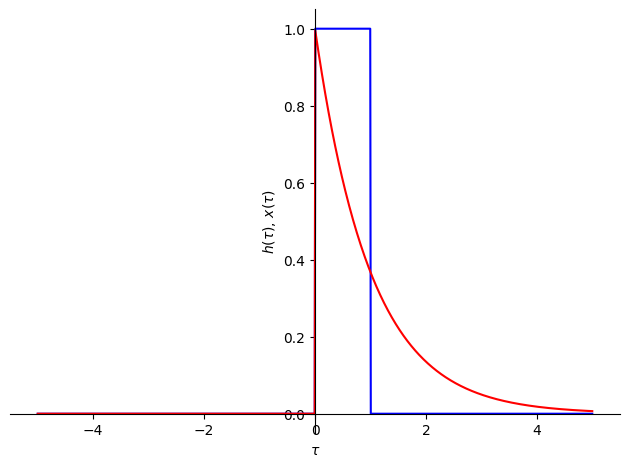

In [ ]:
h1 = h.subs(t, tau)
x1 = x.subs(t, tau)

plot_signals(tau, x1, h1, r'$h(\tau)$, $x(\tau)$', r'$\tau$')

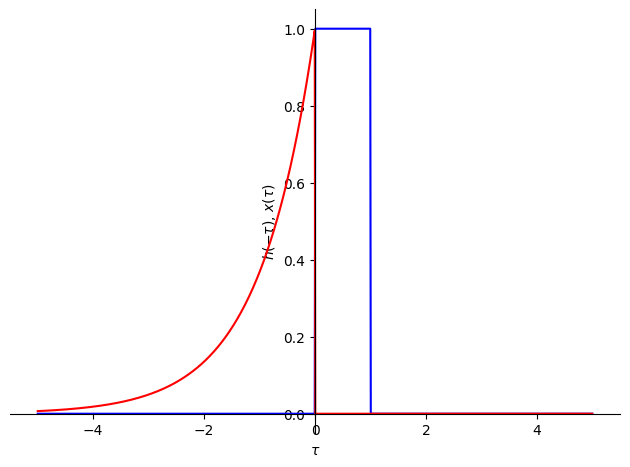

In [ ]:
#Ahora volteamos giraremos la señal h1 camviando el signo del agumento poniendo simetria respecto h2
h2 = h1.subs(tau, -tau)

plot_signals(tau, x1, h2, r'$h(-\tau)$, $x(\tau)$', r'$\tau$')

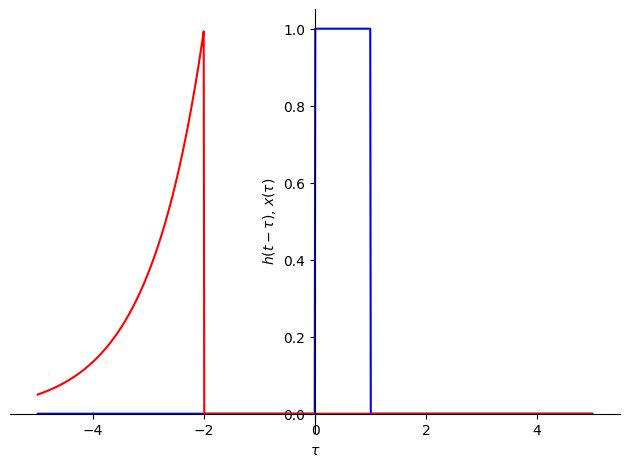

In [ ]:
h3 = h2.subs(tau, tau-t)     #Ahora desplazaremos la señal este es un paso necesario y debera hacercer hasta que se tenga una reconstrcuion de convolucion mejorada esto se logra con mayotr cantidad de desplazmientos
plot_signals(tau, x1, h3.subs(t, -2), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

Ahora resulta obvio que tenemos que considerar tres casos con respecto a la superposición de $h(t−τ)$ y $x(τ)$

1. $t<0$: sin traslape
2. $0 \leq t < 1$: traslape parcial
3. $t > 0$: traslape completo

**Ejercicio**

En el cuarto paso, la evaluación de las integrales de convolución para los tres casos se deja abierta como un ejercicio. Tenga en cuenta que, en el primer caso, no se superponen, es decir que $y(t)=0$ para $t<0$.

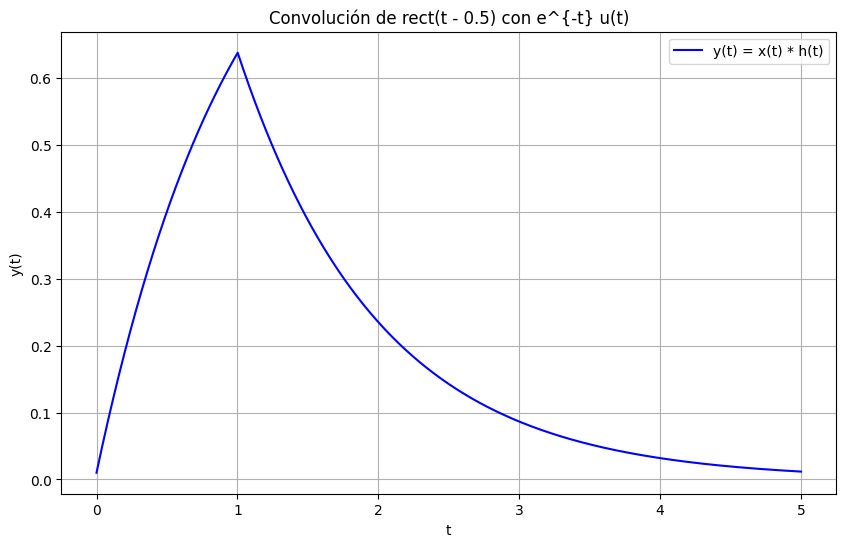

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir x(t) = rect(t - 0.5) => 1 en [0, 1]
def x(t):
    return np.where((t >= 0) & (t <= 1), 1, 0)

# h(t) = e^{-t} u(t)
def h(t):
    return np.where(t >= 0, np.exp(-t), 0)

# Eje de tiempo
t = np.linspace(0, 5, 500)

# Inicializar la salida
y = np.zeros_like(t)

# Dominio de integración (x(tau) ≠ 0 solo entre 0 y 1)
dtau = 0.01
tau = np.arange(0, 1 + dtau, dtau)

# Convolución numérica
for i in range(len(t)):
    integrand = x(tau) * h(t[i] - tau)
    y[i] = np.sum(integrand) * dtau

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='y(t) = x(t) * h(t)', color='blue')
plt.title('Convolución de rect(t - 0.5) con e^{-t} u(t)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()
plt.show()

# Caractertizacion de sistemas lineales e invariables en el tiempo

- Respuesta al impulso

**Ejemplo**

El siguiente ejemplo considera un SLIT cuya relación entre la entrada $x(t)$ y la salida $y(t)$ está dada por una ecuación diferencial ordinaria (EDO) con coeficientes constantes

\begin{equation}
\frac{d}{dt} y(t)+ y(t) = x(t)
\end{equation}

La respuesta del sistema para la señal de entrada $x(t)=e^{-2t}\cdot\epsilon(t)$ se puede calcular mediante:

1. Se resuelve la [EDO](https://en.wikipedia.org/wiki/Ordinary_differential_equation).
2. Se calcula la respuesta al impulso $h(t)$ y se realiza la convolución con la entrada.

Generalmente se asumen condiciones iniciales $y(t)\big\vert_{t=0-}=0$ y $\frac{d}{dt}y(t)\big\vert_{t=0-}=0 $.

Primero, se define la EDO en `SymPy`

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t = sym.symbols('t', real=True) #Definicionde  variables simbolicas
x = sym.Function('x')(t) #funciones simcolicas
y = sym.Function('y')(t)

ode = sym.Eq(y + y.diff(t) , x)#definir ecuacion en simpy con operador diferencial diff diff calcula la derivada simbolica respecto a y
ode



       d              
y(t) + ──(y(t)) = x(t)
       dt             

In [ ]:
solution = sym.dsolve(ode.subs(x, sym.exp(-2*t)*sym.Heaviside(t)))#resolver edo ante entrada x(t)
#se definin condiciones iniciales 0
integration_constants = sym.solve( (solution.rhs.limit(t, 0, '-'), solution.rhs.diff(t).limit(t, 0, '-')), 'C1' )
y1 = solution.subs(integration_constants)
y1

       ⎛        -t     ⎞  -t
y(t) = ⎝θ(t) - ℯ  ⋅θ(t)⎠⋅ℯ  

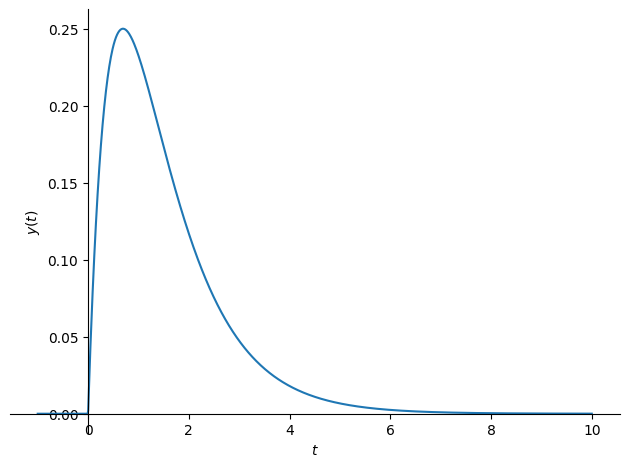

In [ ]:
sym.plot(y1.rhs, (t,-1,10), ylabel=r'$y(t)$'); #Grafica de la solucion de la EDO


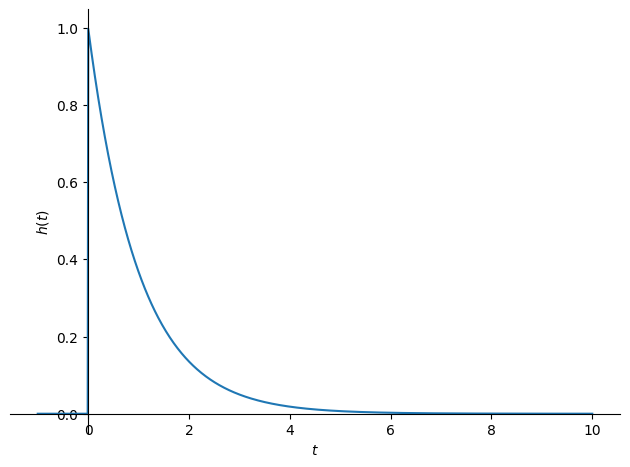

In [ ]:
h = sym.Function('h')(t)
solution2 = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, h))#resolver para delta dirac
integration_constants = sym.solve( (solution2.rhs.limit(t, 0, '-'), solution2.rhs.diff(t).limit(t, 0, '-')), 'C1' )
h = solution2.subs(integration_constants)
h
sym.plot(h.rhs, (t,-1,10), ylabel=r'$h(t)$');

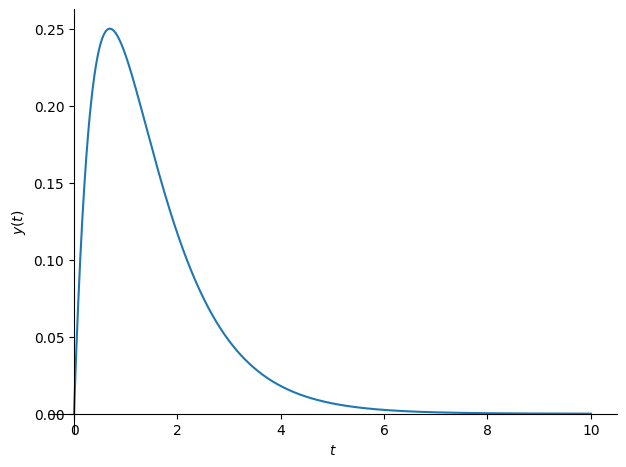

In [ ]:
#Calculo por convolucion
tau = sym.symbols('tau', real=True)

y2 = sym.integrate(sym.exp(-2*tau) * h.rhs.subs(sym.Heaviside(t), 1).subs(t, t-tau), (tau, 0, t))
y2
sym.plot(y2, (t,0,10), ylabel=r'$y(t)$');